Ayşe Nur Sevilmiş
24420200106
# Part 1: Digit recognition using CNNs

training images:


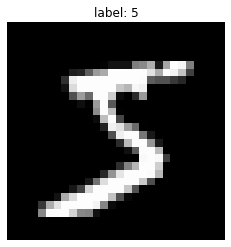

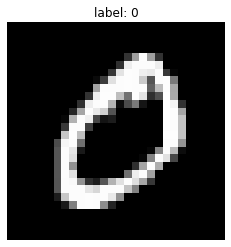

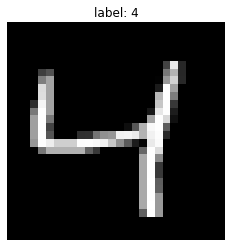

test images:


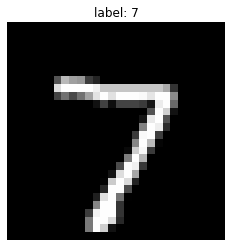

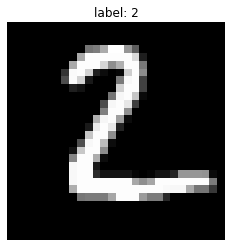

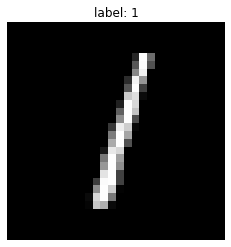

Epoch 1/10
844/844 [==============================] - 20s 18ms/step - loss: 0.3367 - accuracy: 0.8998 - val_loss: 0.0800 - val_accuracy: 0.9793
Epoch 2/10
844/844 [==============================] - 14s 17ms/step - loss: 0.1068 - accuracy: 0.9733 - val_loss: 0.0312 - val_accuracy: 0.9903
Epoch 3/10
844/844 [==============================] - 14s 17ms/step - loss: 0.0707 - accuracy: 0.9815 - val_loss: 0.0378 - val_accuracy: 0.9910
Epoch 4/10
844/844 [==============================] - 14s 17ms/step - loss: 0.0575 - accuracy: 0.9852 - val_loss: 0.0263 - val_accuracy: 0.9930
Epoch 5/10
844/844 [==============================] - 15s 17ms/step - loss: 0.0527 - accuracy: 0.9864 - val_loss: 0.0358 - val_accuracy: 0.9915
Epoch 6/10
844/844 [==============================] - 15s 17ms/step - loss: 0.0496 - accuracy: 0.9880 - val_loss: 0.0324 - val_accuracy: 0.9912
Epoch 7/10
844/844 [==============================] - 15s 17ms/step - loss: 0.0476 - accuracy: 0.9887 - val_loss: 0.0357 - val_accuracy:

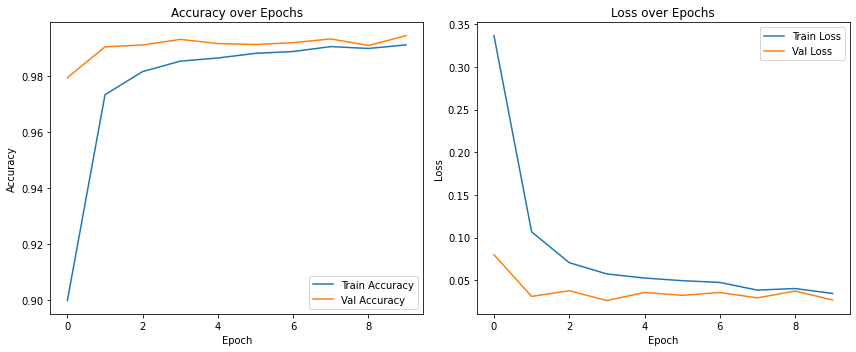

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import random

# function to read labels from a binary file
def read_labels(path):
    with open(path, "rb") as f:
        f.read(8)  # skip the first 8 bytes containing the magic number & number of items
        labels = np.frombuffer(f.read(), dtype = np.uint8)  # frombuffer: raw bytes -> np array, uint8: each byte is a value between 0, 255
    return labels

# function to read images from a binary file
def read_images(path):
    with open(path, "rb") as f:
        f.read(16)  # skip the first 16 bytes containing magic number, number of items & number of rows-cols
        images = np.frombuffer(f.read(), dtype = np.uint8)
        images = images.reshape(-1, 28, 28)  # turn it into a list of 28x28 images
    return images

# function for plotting training history
def plot_training_history(history):
    # accuracy
    plt.figure(figsize = (12, 5))
    # training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label = "Train Accuracy")
    plt.plot(history.history["val_accuracy"], label = "Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label = "Train Loss")
    plt.plot(history.history["val_loss"], label = "Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# file paths
input_path = "mnist_digit_recognition"

train_images_file = input_path + "/train-images.idx3-ubyte"
train_labels_file = input_path + "/train-labels.idx1-ubyte"

test_images_file = input_path + "/t10k-images.idx3-ubyte"
test_labels_file = input_path + "/t10k-labels.idx1-ubyte"

# loading the data
train_images = read_images(train_images_file)
train_labels = read_labels(train_labels_file)

test_images = read_images(test_images_file)
test_labels = read_labels(test_labels_file)

# checking the training and test images
print("training images:")
for i in range(3):
    plt.imshow(train_images[i], cmap = "gray")
    plt.title(f"label: {train_labels[i]}")
    plt.axis("off")
    plt.show()

print("test images:")
for i in range(3):
    plt.imshow(test_images[i], cmap = "gray")
    plt.title(f"label: {test_labels[i]}")
    plt.axis("off")
    plt.show()

# one hot encoding the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# adding the channel dimension (images are grayscale -> 1 channel)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


# building the neural network
model = Sequential()

# convolutional blocks
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu", input_shape = (28, 28, 1)))  # "padding = same" to make sure that output shape = input shape
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))  # shrinking the image size by 2x2: 28x28 -> 14x14
model.add(Dropout(0.25))  # 25% dropout

model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# flattening into 1D vector
model.add(Flatten())  

# fully connected layers
model.add(Dense(256, activation = "relu"))  # 256 neurons
model.add(Dropout(0.5))  # increased dropout to prevent overfitting due to increased params
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))

# output layer
model.add(Dense(10, activation = "softmax"))  # 10 outputs -> 1 for each digit

# compiling the model with adam optimizer and categorical cross entropy loss
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# training the model
history = model.fit(
    train_images, train_labels,
    epochs = 10,
    batch_size = 64,
    validation_split = 0.1  # 10% of training data used for validation
)

# evaluating model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

plot_training_history(history)

# Part 2: Input optimization for a CNN


Digit: 0


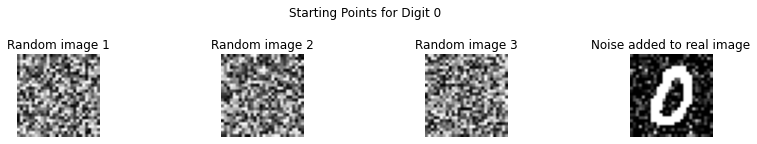

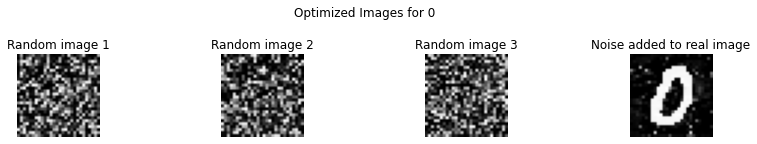


Best confidence for 0: 0.0000
Best starting point for 0: Real+Noise


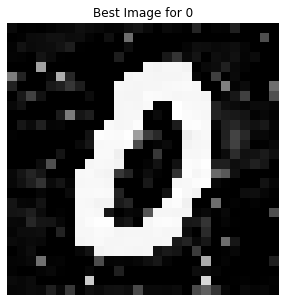


Digit: 1


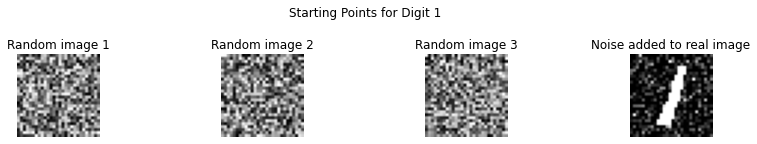

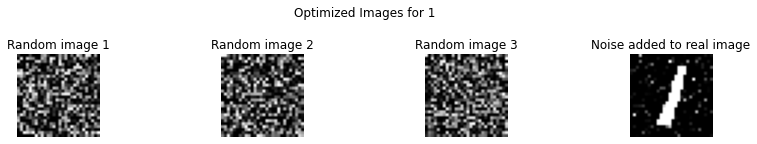


Best confidence for 1: 0.9799
Best starting point for 1: Random Trial 3


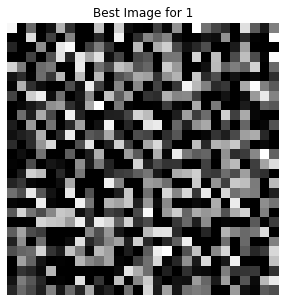


Digit: 2


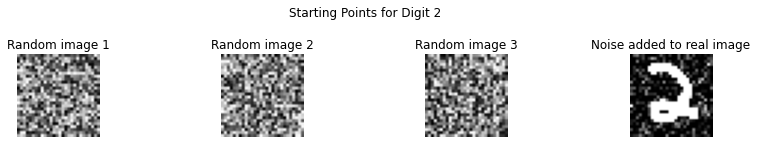

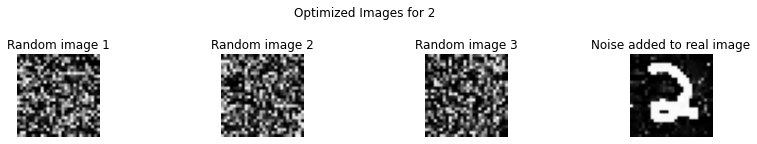


Best confidence for 2: 0.0000
Best starting point for 2: Real+Noise


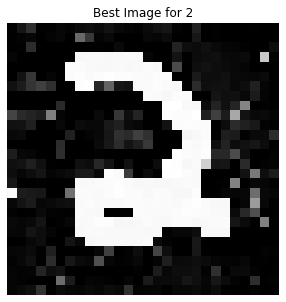


Digit: 3


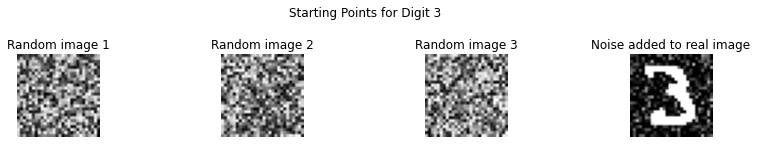

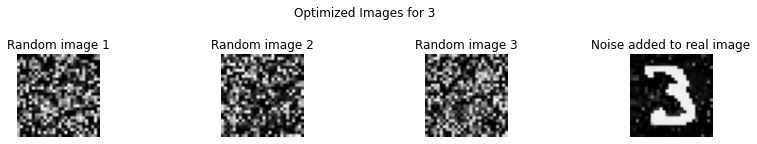


Best confidence for 3: 0.0000
Best starting point for 3: Real+Noise


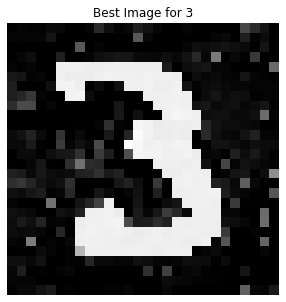


Digit: 4


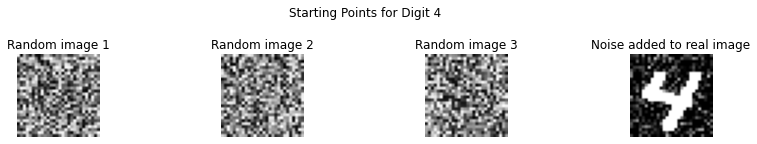

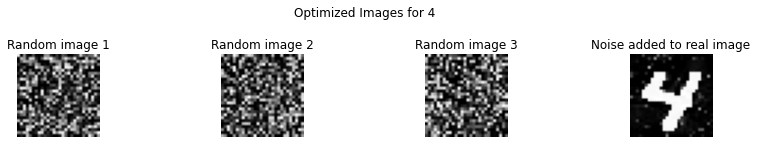


Best confidence for 4: 0.0001
Best starting point for 4: Real+Noise


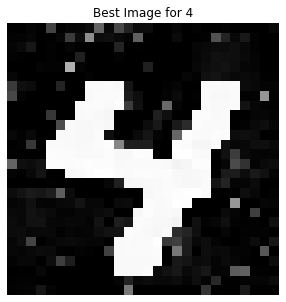


Digit: 5


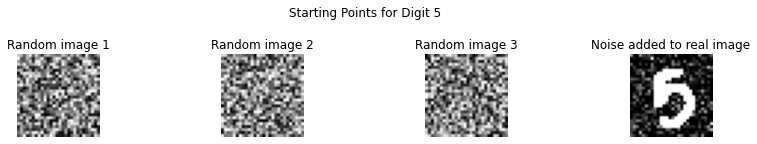

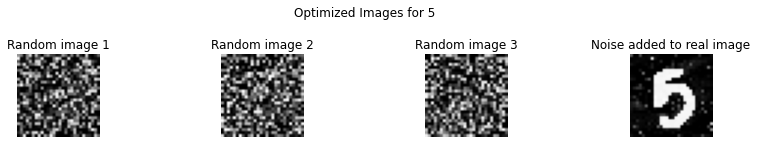


Best confidence for 5: 0.0000
Best starting point for 5: Real+Noise


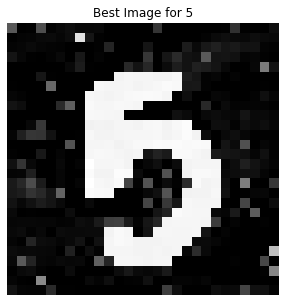


Digit: 6


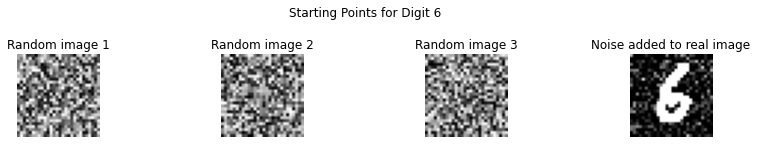

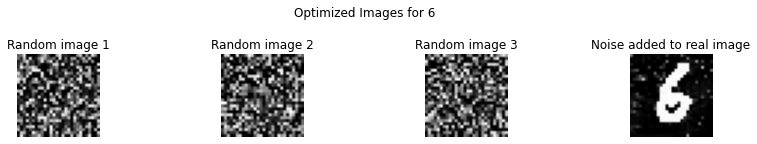


Best confidence for 6: 0.0000
Best starting point for 6: Real+Noise


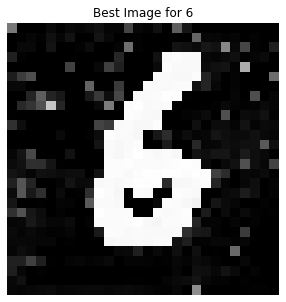


Digit: 7


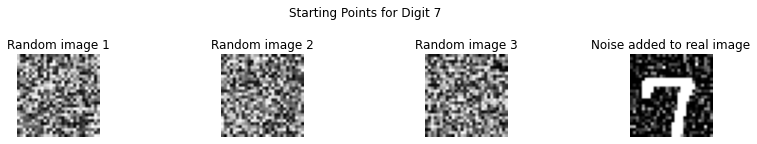

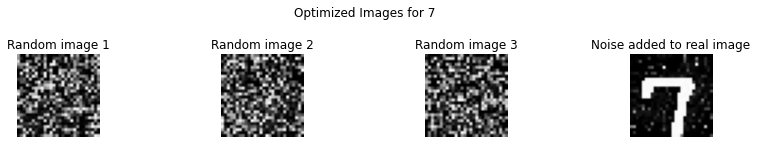


Best confidence for 7: 0.0266
Best starting point for 7: Real+Noise


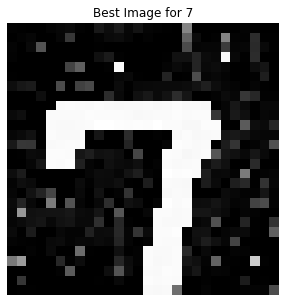


Digit: 8


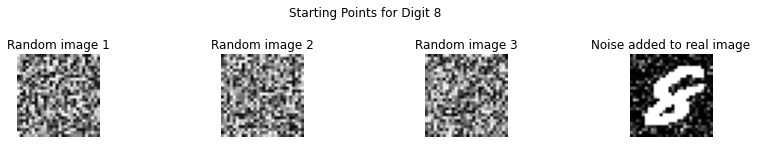

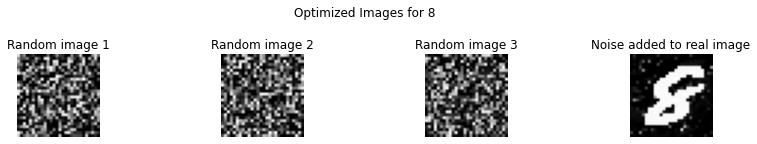


Best confidence for 8: 0.0000
Best starting point for 8: Real+Noise


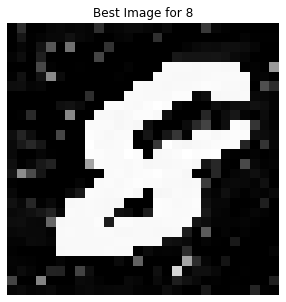


Digit: 9


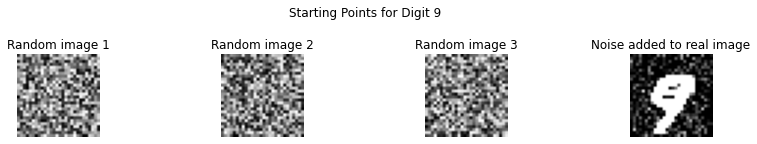

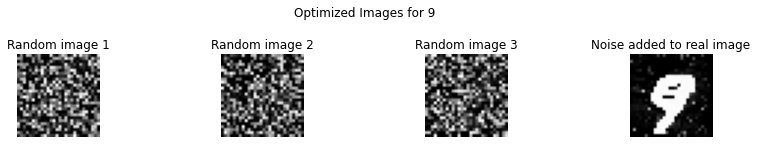


Best confidence for 9: 0.0005
Best starting point for 9: Real+Noise


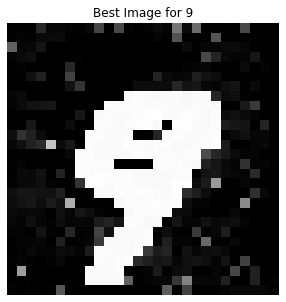

Confidence for digit 2: 0.0000
Confidence for digit 3: 0.0000


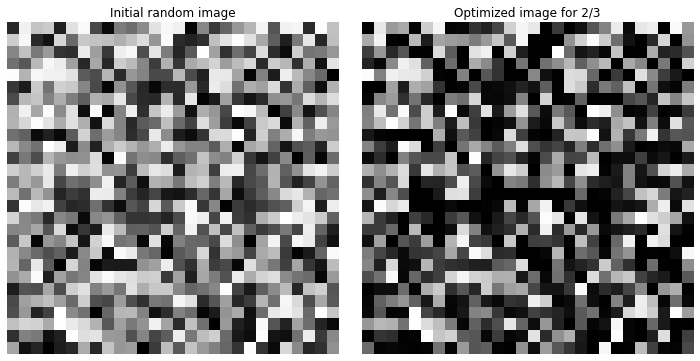

In [3]:
# parameters for optimization
num_random_trials = 3    # number of random starting points per digit
steps = 100               # number of optimization steps
learning_rate = 0.005     # optimizer learning rate
noise_strength = 0.3     # std of noise added to real image

# finding the correct label for each training image
label_numbers = []
for label in train_labels:
    for i in range(len(label)):
        if label[i] == 1:
            label_numbers.append(i)
            break

# grouping real images by digit
real_images_per_digit = {}

for digit in range(10):
    # finding indices where label == digit
    indices = [index for index, value in enumerate(label_numbers) if value == digit]
    images = train_images[indices]
    real_images_per_digit[digit] = images

# optimizing an image to look like each digit
for target_digit in range(10):
    print(f"\nDigit: {target_digit}")

    target_vector = tf.one_hot(target_digit, depth=10) # one hot encoding

    best_confidence = 0
    best_image = None
    best_starting_point = ""

    starting_images = []
    optimized_images = []
    starting_labels = []

    # random images
    for trial in range(num_random_trials):
        image = tf.Variable(np.random.rand(28, 28, 1).astype(np.float32))

        starting_images.append(image.numpy().reshape(28, 28))
        starting_labels.append(f"Random image {trial+1}")

        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

        for step in range(steps):
            with tf.GradientTape() as tape:
                clipped_image = tf.clip_by_value(image, 0.0, 1.0) # making sure values are 0-1
                input_image = tf.reshape(clipped_image, (1, 28, 28, 1))
                prediction = model(input_image)
                loss = tf.keras.losses.categorical_crossentropy(target_vector[None, :], prediction)
                reg_loss = 1e-1 * tf.reduce_sum(tf.square(clipped_image)) # regularization
                total_loss = loss + reg_loss

            grads = tape.gradient(total_loss, image)
            optimizer.apply_gradients([(grads, image)])
            image.assign(tf.clip_by_value(image, 0.0, 1.0)) # ensuring pixel values are in range

        final_pred = model.predict(image.numpy().reshape(1, 28, 28, 1), verbose=0)
        final_confidence = final_pred[0][target_digit]

        optimized_images.append(image.numpy().reshape(28, 28))

        if final_confidence > best_confidence:
            best_confidence = final_confidence
            best_image = image.numpy().reshape(28, 28)
            best_starting_point = f"Random Trial {trial + 1}"

    # noisy image
    real_sample = random.choice(real_images_per_digit[target_digit])
    noisy_real_image = real_sample + noise_strength * np.random.normal(0, 1, size=real_sample.shape)
    noisy_real_image = np.clip(noisy_real_image, 0.0, 1.0)

    image = tf.Variable(noisy_real_image.astype(np.float32))
    starting_images.append(image.numpy().reshape(28, 28))
    starting_labels.append("Noise added to real image")

    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

    for step in range(steps):
        with tf.GradientTape() as tape:
            clipped_image = tf.clip_by_value(image, 0.0, 1.0)
            input_image = tf.reshape(clipped_image, (1, 28, 28, 1))
            prediction = model(input_image)
            loss = tf.keras.losses.categorical_crossentropy(target_vector[None, :], prediction)
            reg_loss = 1e-1 * tf.reduce_sum(tf.square(clipped_image))
            total_loss = loss + reg_loss

        grads = tape.gradient(total_loss, image)
        optimizer.apply_gradients([(grads, image)])
        image.assign(tf.clip_by_value(image, 0.0, 1.0))

    final_pred = model.predict(image.numpy().reshape(1, 28, 28, 1), verbose=0)
    final_confidence = final_pred[0][target_digit]

    optimized_images.append(image.numpy().reshape(28, 28))

    if final_confidence > best_confidence:
        best_confidence = final_confidence
        best_image = image.numpy().reshape(28, 28)
        best_starting_point = "Real+Noise"

    # plotting starting points
    plt.figure(figsize=(12, 2))
    for i, img in enumerate(starting_images):
        plt.subplot(1, len(starting_images), i+1)
        plt.imshow(img, cmap="gray")
        plt.title(starting_labels[i])
        plt.axis("off")
    plt.suptitle(f"Starting Points for Digit {target_digit}")
    plt.tight_layout()
    plt.show()

    # plotting optimized images
    plt.figure(figsize = (12, 2))
    for i, img in enumerate(optimized_images):
        plt.subplot(1, len(optimized_images), i+1)
        plt.imshow(img, cmap = "gray")
        plt.title(f"{starting_labels[i]}")
        plt.axis("off")
    plt.suptitle(f"Optimized Images for {target_digit}")
    plt.tight_layout()
    plt.show()

    # final best image
    print(f"\nBest confidence for {target_digit}: {best_confidence:.4f}")
    print(f"Best starting point for {target_digit}: {best_starting_point}")

    plt.figure(figsize = (5, 5))
    plt.imshow(best_image, cmap = "gray")
    plt.title(f"Best Image for {target_digit}")
    plt.axis("off")
    plt.show()



# digit between 2-3
target_vector = tf.constant([0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0], dtype=tf.float32)

# random initialization
initial_image_np = np.random.rand(28, 28, 1).astype(np.float32)  # initial image
image = tf.Variable(initial_image_np.copy())  # for optimization

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

for step in range(steps):
    with tf.GradientTape() as tape:
        clipped_image = tf.clip_by_value(image, 0.0, 1.0)
        input_image = tf.reshape(clipped_image, (1, 28, 28, 1))
        prediction = model(input_image)
        loss = tf.keras.losses.categorical_crossentropy(target_vector[None, :], prediction)
        reg_loss = 1e-1 * tf.reduce_sum(tf.square(clipped_image))
        total_loss = loss + reg_loss

    grads = tape.gradient(total_loss, image)
    optimizer.apply_gradients([(grads, image)])
    image.assign(tf.clip_by_value(image, 0.0, 1.0))

# make prediction from optimized image
final_pred = model.predict(image.numpy().reshape(1, 28, 28, 1), verbose=0)
confidence_digit_2 = final_pred[0][2]
confidence_digit_3 = final_pred[0][3]

# confidences
print(f"Confidence for digit 2: {confidence_digit_2:.4f}")
print(f"Confidence for digit 3: {confidence_digit_3:.4f}")

# plotting initial and optimized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(initial_image_np.reshape(28, 28), cmap="gray")
plt.title("Initial random image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image.numpy().reshape(28, 28), cmap="gray")
plt.title("Optimized image for 2/3")
plt.axis("off")

plt.tight_layout()
plt.show()